In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [6]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [8]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [9]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [10]:
LEARNING_RATE = 0.1
#너무 느린학습을 빠르게 바꿔주기 위해 기존의 0.0001이던 학습률을 0.1로 올려주었다.

In [14]:
#%%timeit -n 1 -r 1
global W, b

losses = []
for e in range(1,11) : 
    for i in range(1, 1001):
        dW, db = gradient(X_train, W, b, y_train)
        W -= LEARNING_RATE * dW
        b -= LEARNING_RATE * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
        if i % 100 == 0:
            print(f'Epoch : {e} Iteration {i} : Loss %0.4f' % (L))
#모델의 성능을 올리기 위해 충분한 학습을 진행하도록 에폭을 늘려주었다.            

Epoch : 1 Iteration 100 : Loss 2897.9519
Epoch : 1 Iteration 200 : Loss 2897.8941
Epoch : 1 Iteration 300 : Loss 2897.8382
Epoch : 1 Iteration 400 : Loss 2897.7842
Epoch : 1 Iteration 500 : Loss 2897.7319
Epoch : 1 Iteration 600 : Loss 2897.6813
Epoch : 1 Iteration 700 : Loss 2897.6322
Epoch : 1 Iteration 800 : Loss 2897.5845
Epoch : 1 Iteration 900 : Loss 2897.5382
Epoch : 1 Iteration 1000 : Loss 2897.4932
Epoch : 2 Iteration 100 : Loss 2897.4494
Epoch : 2 Iteration 200 : Loss 2897.4067
Epoch : 2 Iteration 300 : Loss 2897.3650
Epoch : 2 Iteration 400 : Loss 2897.3244
Epoch : 2 Iteration 500 : Loss 2897.2847
Epoch : 2 Iteration 600 : Loss 2897.2459
Epoch : 2 Iteration 700 : Loss 2897.2080
Epoch : 2 Iteration 800 : Loss 2897.1708
Epoch : 2 Iteration 900 : Loss 2897.1344
Epoch : 2 Iteration 1000 : Loss 2897.0987
Epoch : 3 Iteration 100 : Loss 2897.0637
Epoch : 3 Iteration 200 : Loss 2897.0293
Epoch : 3 Iteration 300 : Loss 2896.9955
Epoch : 3 Iteration 400 : Loss 2896.9622
Epoch : 3 Iter

In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2880.3066315365413)

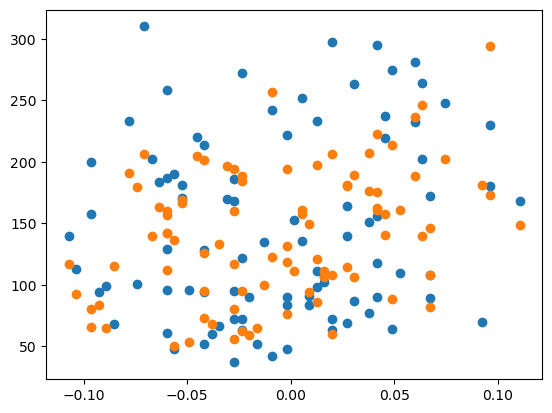

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [ ]:
#____________________________________________________

In [15]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [54]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,time_bin
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,2.205218
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,2.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,3.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,3.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,0.815307


In [86]:
def time_binner(hour) :
    if 6 <= hour<12 :
        return 1
    elif 12<= hour <= 18 :
        return 2
    else :
        return 3
train['time_bin'] = train['hour'].apply(time_binner)
#시간대별 이용자의 변화가 클것으로 예상 해 시간을 오전,오후,야간으로 바이닝을 해 학습에 도움이 되도록 했다.

In [87]:
def temp_binner(hour) :
    if temp < 10 :
        return 1
    elif 10<= hour < 17 :
        return 2
    elif 17<= hour <= 26 :
        return 3   
    else :
        return 4
train['temp_bin'] = train['temp'].apply(time_binner)
#시간 바이너와 비슷한 목적으로 진행을 해보았지만 오히려 에러를 증가시켰다.

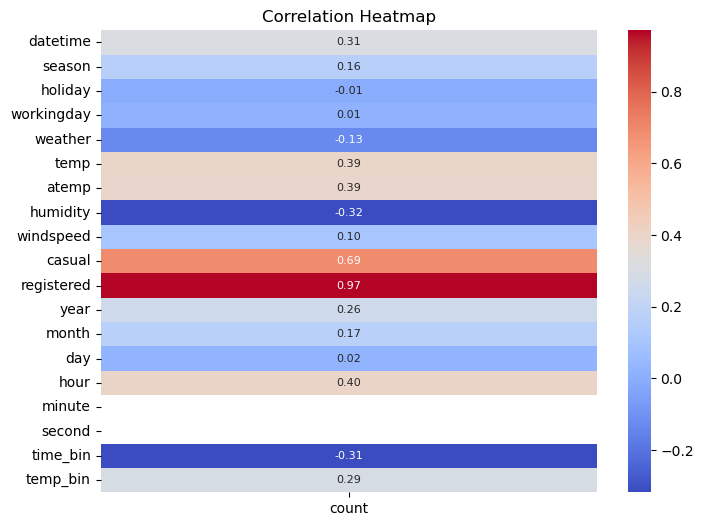

In [88]:
corr = train.corr()
#target = 'count'
#corr_target = corr[[target]].drop(target)
corr_target = corr[]

plt.figure(figsize=(8, 6))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

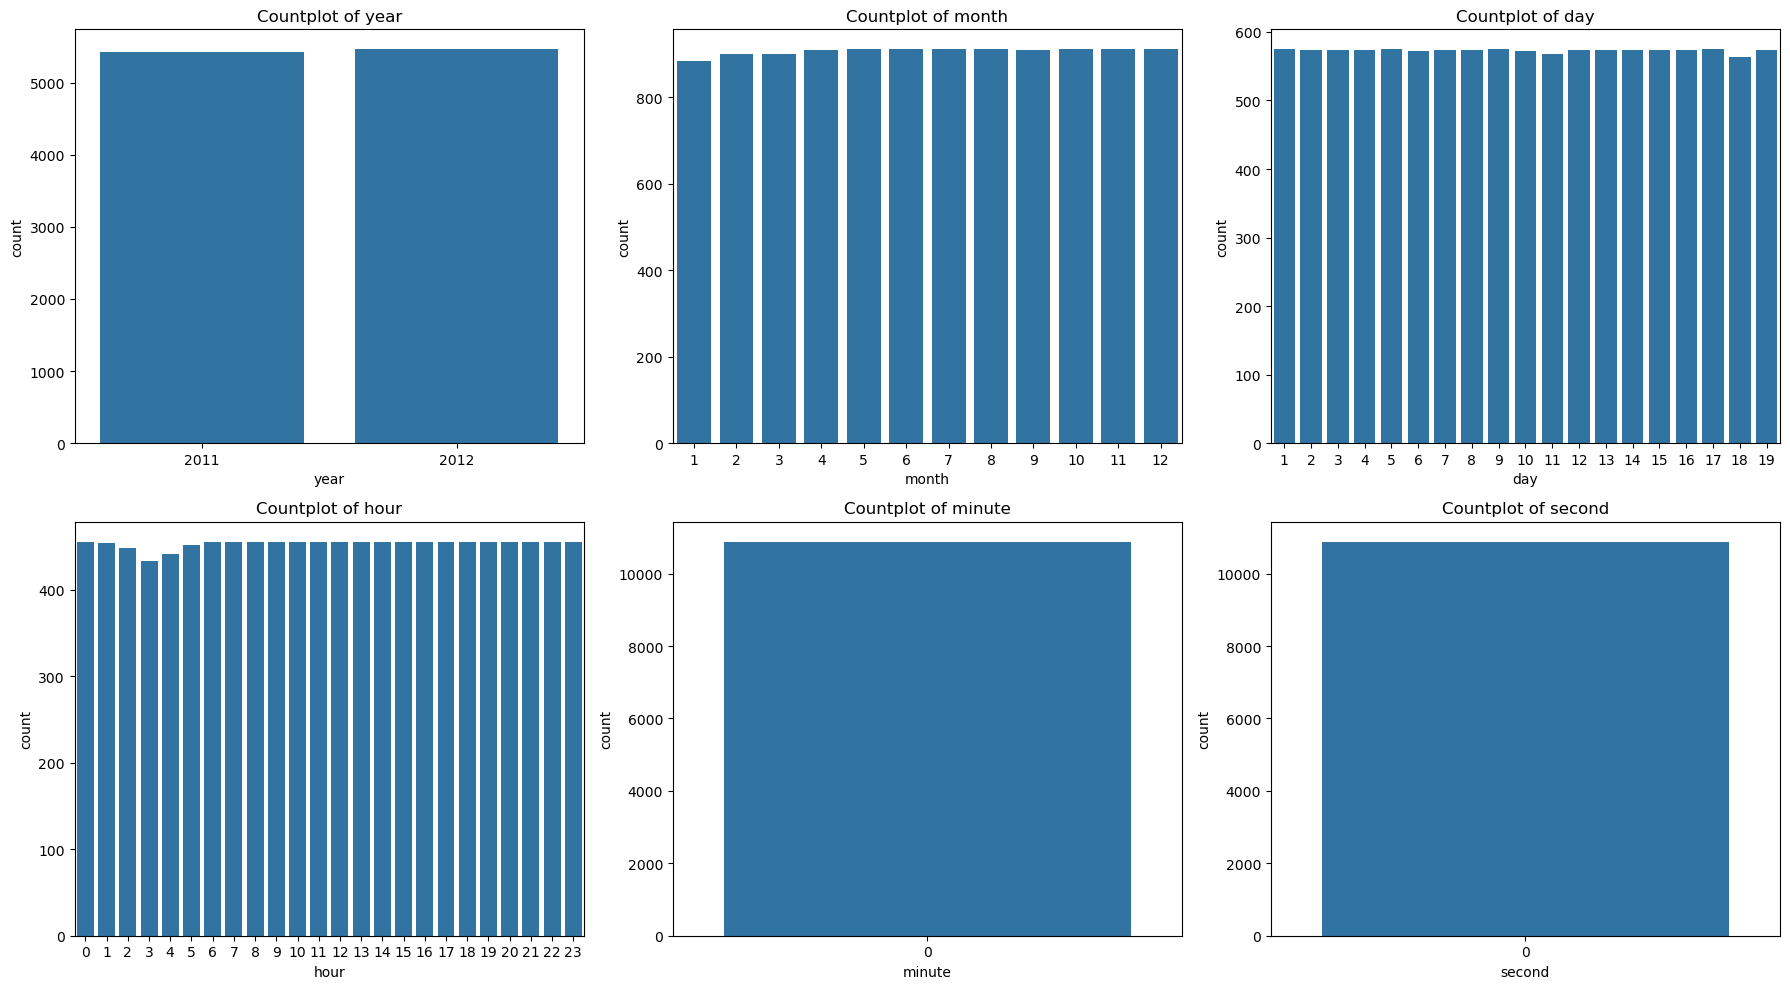

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()



In [93]:
#features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed', 'time_bin']
#features = ['year', 'month', 'day', 'hour', 'temp_bin', 'humidity', 'windspeed', 'time_bin']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

model = LinearRegression()
model.fit(X_train, y_train)

model_SGD = SGDRegressor(max_iter=100, tol = 1e-3)
model_SGD.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [99]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

y_pred_SGD = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_SGD)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 16545.650891575246
RMSE: 128.6298989021419
MSE: 16545.650891575246
RMSE: 128.6298989021419


In [102]:
#importances = model_SGD.feature_importances_
print(model.coef_)
print(model_SGD.coef_)

[ 83.14919729   7.42482501   0.30367986   8.96193033   6.28206258
  -1.78422585  -0.20436946 -72.21099727]
[-5.71924242e+11 -2.27733464e+12 -1.99649911e+12  2.76474734e+12
  9.67430906e+11 -1.76101217e+12  1.01689241e+13  4.56479752e+10]


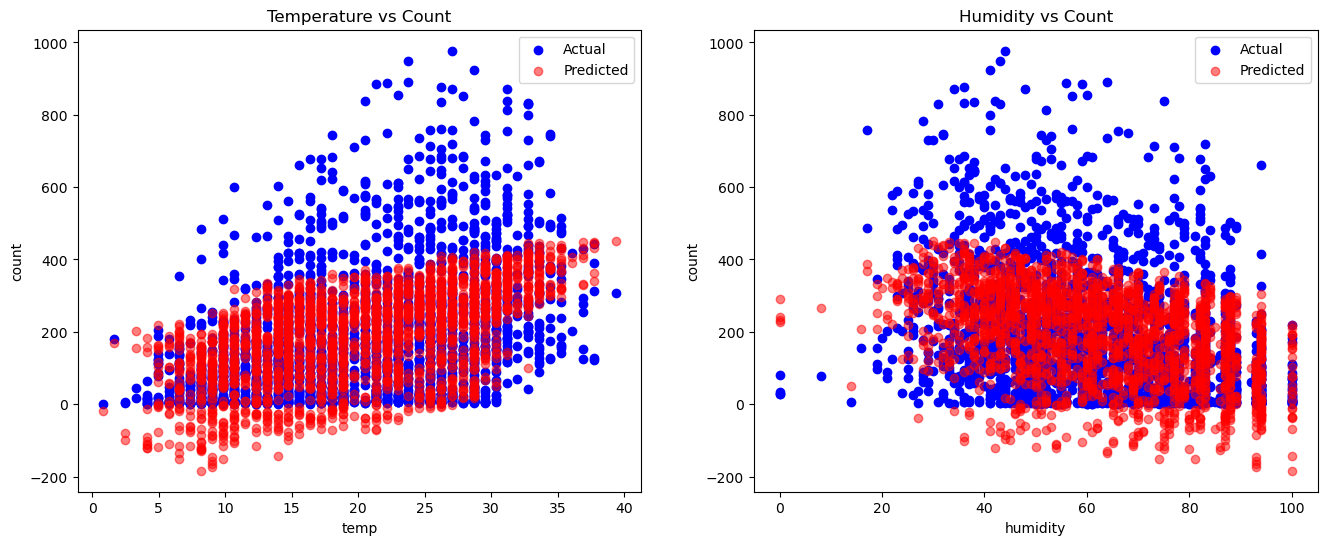

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

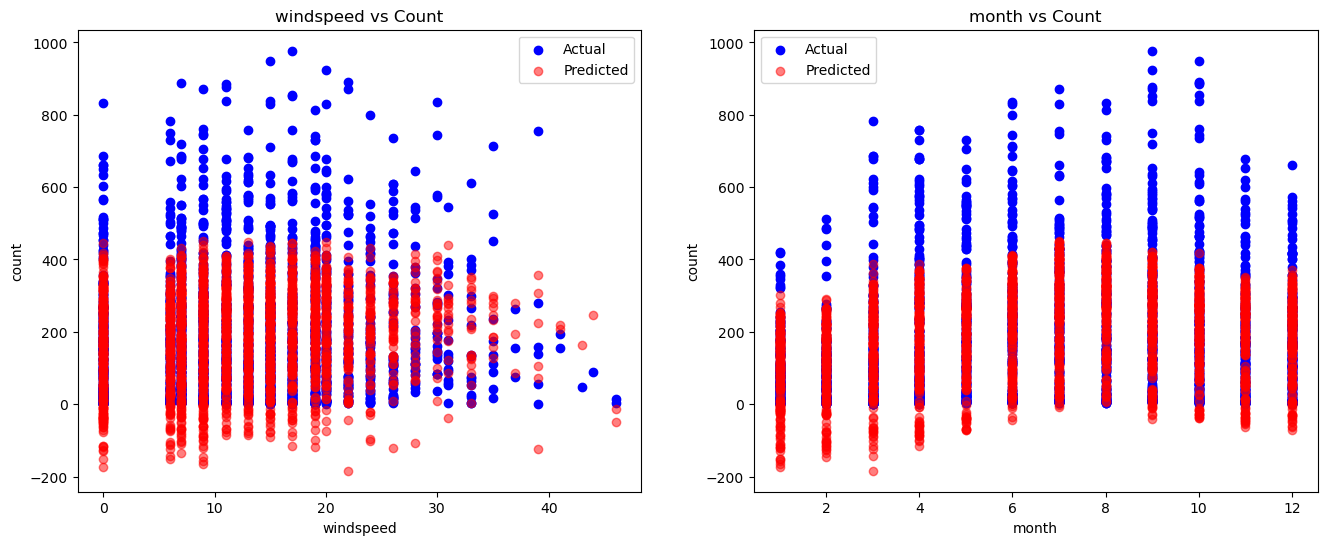

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['windspeed'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['windspeed'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('windspeed')
axs[0].set_ylabel('count')
axs[0].set_title('windspeed vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['month'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['month'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('month')
axs[1].set_ylabel('count')
axs[1].set_title('month vs Count')
axs[1].legend()

In [ ]:
review

time_bin을 통해 time을 3구간으로 바이닝해 수행하였을때
성능이 128까지 증가함을 확인

모델을 SGDRegression을 이용해봤지만 
같은 에러수치가 되었다.


tempbin을 만들어 
temp<10
10<= temp <27
else
로 수행시 131로 에러가 증가함

리그레션의 경우 model.coef 를 통해 피처의 기여도를 확인할 수 있고
트리기반 모델의 경우
importances = model_SGD.featureimportances
을 통해 높은 가중치를 가진 피처를 확인할 수 있다.